In [1]:
#Overarching importation
import sys, os
PROJECT_ROOT = os.path.abspath("..")  # go up one directory from notebooks/
if PROJECT_ROOT not in sys.path:
    sys.path.insert(0, PROJECT_ROOT)

In [2]:
from src.Ingest_Data import DataIngestorFactory
from src.Missing_value_handling import MissingValueHandler,FillMissingValue,DropMissingValue

#-------#
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score
)

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To use statistical functions
import scipy.stats as stats

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

In [3]:
#Load Data
BASE_URL = "http://127.0.0.1:8000"
TRAIN_ENDPOINT = f"{BASE_URL}/train"
TEST_ENDPOINT = f"{BASE_URL}/test"

In [4]:
df_train = DataIngestorFactory.get_data_ingestor(TRAIN_ENDPOINT).ingest(TRAIN_ENDPOINT)

2025-09-28 16:49:57 [INFO] src.Ingest_Data: Fetching data from API endpoint: http://127.0.0.1:8000/train
2025-09-28 16:50:00 [INFO] src.Ingest_Data: Received 40000 records from API


## Data Overview

In [5]:
df_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-3.50521329,5.070816556,2.500694783,0.751565909,5.414091884,0.085034014,-2.304466047,0.118047857,-1.917490871,-1.481235507,-0.401580755,-0.383877161,2.093071066,-2.54405025,-6.322206646,0.101501597,-3.077733811,2.18948964,-2.76623031,-8.532590498,-4.035947699,-0.451932017,2.344674807,8.755114487,-5.63217525,11.08179215,-9.061559909,-4.612240557,2.30346127,4.726939318,8.127774161,14.97257018,11.98908431,-9.41026118,6.079984055,-0.366139407,-3.153986879,0.198259881,-1.380438121,-0.156229058,0
1,3.840802303,-0.744551858,7.325602151,-5.815326648,-3.062697946,0.480068893,0.544013551,-4.043584393,-1.173479445,3.570352181,1.516160499,3.125625688,3.469452029,-1.517163959,-0.010414687,-4.603568994,-7.747528181,-0.092048171,3.502156424,-4.092504943,-5.896325959,0.18360786,-6.979060653,-4.212251559,2.162944114,2.416607657,9.254014063,-3.024135461,-0.864818814,-2.635425969,3.194720624,-8.584323555,-0.376982618,2.319751936,3.659976998,6.080059081,-1.103211373,2.495441845,3.854861547,-0.808084268,0
2,0.909041707,-2.659715845,5.23223366,-1.308306897,-2.524055462,-0.539079492,-2.809633119,-3.273907609,1.266268536,2.609635312,-0.376448973,-1.266170538,5.949901722,0.193781385,-5.839702123,-6.11081602,-6.215282502,0.96225224,2.062659187,-0.235606345,-7.924292746,1.119333434,-3.917758303,-2.019913484,0.086639631,1.969606561,3.64758391,-2.929553124,-1.423194386,0.915970412,1.530391847,0.103229575,2.596978305,-0.314528811,6.30550081,3.232577247,-1.688521389,-2.430388282,2.077602715,-4.474148368,0
3,5.540182389,-3.418732874,2.850160289,-4.977010325,-3.266263267,-2.005542309,0.351839972,4.183686481,-1.042189162,0.005901722,0.511535252,4.027686478,3.567224259,1.548408543,0.968034206,1.966342172,-2.315081966,-0.445240945,-0.655340221,1.105057898,-3.893176457,1.49443398,1.209758265,-4.33280043,2.528666468,-2.123617113,4.875340326,-3.018929562,0.059887075,0.829727922,3.50627004,-2.459006134,-2.715226487,-1.061804307,3.418639689,3.773496811,0.830943297,-7.524015157,-0.582113023,2.561392592,0
4,4.931424537,1.703925804,0.378594124,-1.852290737,-1.982952197,2.618002739,-0.037659152,-5.684056956,1.974835984,0.635661901,3.733109986,-1.529581199,2.08796597,-1.975366299,-2.540944126,-7.336932177,-5.21599569,0.914929596,1.820737733,-5.433117669,-6.468315754,3.334848972,-1.278702805,-0.334552582,-0.610565419,2.370671737,3.896117587,-1.191919141,0.521882695,1.508146502,-2.476665915,-2.192863313,3.676466461,-2.182368434,4.442203594,-3.430837625,-2.142127532,5.004706628,-0.327188268,-2.086378395,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,1.175070685,-1.354790335,4.106679832,4.014808477,-3.08519116,-2.8877693,-3.050924309,-1.069377322,3.245813942,-0.370393347,-3.216258494,-1.043554297,4.296519355,-0.440718538,-5.827998491,-7.480750973,0.869538473,-0.12481826,4.162417932,5.316583601,-8.773385843,2.2173477,-1.612855571,-0.531429599,0.809040758,0.488173697,-1.227794232,-0.422682819,-1.854792217,1.706176028,-2.883190005,0.478599317,-1.000454315,0.6444447,6.780884066,-1.356444055,-0.777821699,-4.558386717,-0.21265466,-5.18056806,0
39996,3.775296069,3.824924852,2.867824637,3.368808378,-0.679749651,-0.93094318,-0.629292982,-2.947774279,2.73803133,-1.023083943,-1.784042431,-1.500553958,0.729498711,-2.371941144,-2.435113753,-7.403036414,0.845352509,-0.654052754,3.320158029,-1.116302402,-6.952262692,2.486065074,-1.201013847,2.510261148,0.379567772,4.29310959,-1.096456734,-0.132731744,-1.704850656,-0.450575227,-1.175255265,0.7074224,0.319390053,-1.67115523,4.872693381,-3.810462188,-2.274626778,1.552467449,-1.335479748,-2.682234281,0
39997,4.40251548,1.898080401,8.21322859,-5.058250262,-0.004670586,0.26511292,0.280303465,-4.859109781,0.583682242,2.709747088,-2.475479055,-0.52946207,2.9653369

In [6]:
df_train.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
39995,1.175070685,-1.354790335,4.106679832,4.014808477,-3.08519116,-2.8877693,-3.050924309,-1.069377322,3.245813942,-0.370393347,-3.216258494,-1.043554297,4.296519355,-0.440718538,-5.827998491,-7.480750973,0.869538473,-0.12481826,4.162417932,5.316583601,-8.773385843,2.2173477,-1.612855571,-0.531429599,0.809040758,0.488173697,-1.227794232,-0.422682819,-1.854792217,1.706176028,-2.883190005,0.478599317,-1.000454315,0.6444447,6.780884066,-1.356444055,-0.777821699,-4.558386717,-0.21265466,-5.18056806,0
39996,3.775296069,3.824924852,2.867824637,3.368808378,-0.679749651,-0.93094318,-0.629292982,-2.947774279,2.73803133,-1.023083943,-1.784042431,-1.500553958,0.729498711,-2.371941144,-2.435113753,-7.403036414,0.845352509,-0.654052754,3.320158029,-1.116302402,-6.952262692,2.486065074,-1.201013847,2.510261148,0.379567772,4.29310959,-1.096456734,-0.132731744,-1.704850656,-0.450575227,-1.175255265,0.7074224,0.319390053,-1.67115523,4.872693381,-3.810462188,-2.274626778,1.552467449,-1.335479748,-2.682234281,0
39997,4.40251548,1.898080401,8.21322859,-5.058250262,-0.004670586,0.26511292,0.280303465,-4.859109781,0.583682242,2.709747088,-2.475479055,-0.52946207,2.965336937,-0.920127176,-0.169825241,-5.557410998,-6.071037355,0.686798156,-0.582803849,-5.006768701,-5.09204302,-0.250772081,-7.199578485,-3.193282208,3.386231677,6.136171476,8.558925278,-3.799043497,-4.246879336,-7.507146737,6.808199308,-6.508814867,-1.887434411,-0.800875867,0.428508147,7.642029805,-1.733124253,1.286774582,3.785824899,0.857216799,0
39998,6.670838815,0.560989556,4.951878588,-8.838304191,0.115902667,2.060838281,0.828419718,-3.065245391,-1.719198788,2.69843508,0.114142177,0.843902412,0.875431051,-0.673725526,1.535266553,-3.481283381,-6.84135868,2.92660457,-2.672359903,-8.330404239,-4.56642798,2.00206959,-2.936165858,-0.477323942,2.595095548,3.645902003,8.598595006,-4.111790935,-1.981040033,-3.93668521,8.218422782,-3.222395732,1.116357661,-4.306598329,1.9540253,6.933074687,-1.578064277,1.665011506,1.67036566,4.124315874,0
39999,-3.82735588,-1.322654134,3.270700181,4.096240525,-0.245822996,-3.370795876,-2.261325458,0.928429515,-0.308876914,1.83169191,-3.735426852,1.036158038,3.113595481,0.438078199,-4.615141395,-1.82477945,-0.097874555,-0.817420911,4.14924135,3.231469076,-3.766531989,-0.149939893,-0.360505833,3.066127034,-1.331662355,1.491825433,-2.985401563,-0.103360157,-2.692704923,0.717533913,0.93108635,5.900487101,0.141734701,2.227172491,4.440586347,1.942901404,-1.095922523,-2.84814192,1.273028111,-5.729173589,0


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   V1      40000 non-null  object
 1   V2      40000 non-null  object
 2   V3      40000 non-null  object
 3   V4      40000 non-null  object
 4   V5      40000 non-null  object
 5   V6      40000 non-null  object
 6   V7      40000 non-null  object
 7   V8      40000 non-null  object
 8   V9      40000 non-null  object
 9   V10     40000 non-null  object
 10  V11     40000 non-null  object
 11  V12     40000 non-null  object
 12  V13     40000 non-null  object
 13  V14     40000 non-null  object
 14  V15     40000 non-null  object
 15  V16     40000 non-null  object
 16  V17     40000 non-null  object
 17  V18     40000 non-null  object
 18  V19     40000 non-null  object
 19  V20     40000 non-null  object
 20  V21     40000 non-null  object
 21  V22     40000 non-null  object
 22  V23     40000 non-null

In [8]:
# let's check for duplicate values in the data
df_train.duplicated().sum()

np.int64(0)

In [9]:
df_train.nunique()

V1        39951
V2        39971
V3        40000
V4        40000
V5        40000
V6        40000
V7        40000
V8        40000
V9        40000
V10       40000
V11       40000
V12       40000
V13       40000
V14       40000
V15       39999
V16       40000
V17       40000
V18       40000
V19       40000
V20       40000
V21       40000
V22       40000
V23       40000
V24       40000
V25       40000
V26       40000
V27       40000
V28       40000
V29       40000
V30       40000
V31       40000
V32       40000
V33       40000
V34       40000
V35       40000
V36       40000
V37       40000
V38       40000
V39       40000
V40       40000
Target        2
dtype: int64

## Univariate Analysis

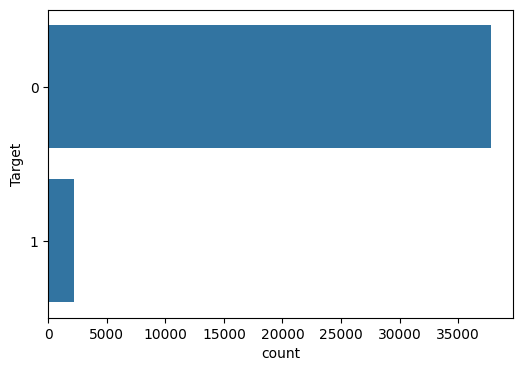

Target
0    37802
1     2198
Name: count, dtype: int64

In [10]:
plt.figure(figsize=(6, 4))
sns.countplot(df_train["Target"],)
plt.show()
df_train["Target"].value_counts()

- "Target" class is imbalanced with 37802 or 94.5% "No failures (i.e., 0)" and 2198 or 5.4% "Failures (i.e., 1)"

## Data Pre-processing
- Missing value Handing

In [13]:
missing_value_handle = MissingValueHandler.set_strategy(strategy = FillMissingValue(method='mean'))

TypeError: MissingValueHandler.set_strategy() missing 1 required positional argument: 'self'